<a href="https://colab.research.google.com/github/krakowiakpawel9/data-science-bootcamp/blob/master/02_analiza_danych/02_dane_gieldowe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* @author: krakowiakpawel9@gmail.com  
* @site: e-smartdata.org

### Pandas
>Strona biblioteki: [https://pandas.pydata.org/](https://pandas.pydata.org/)  
>Dokumentacja: [https://pandas.pydata.org/pandas-docs/stable/](https://pandas.pydata.org/pandas-docs/stable/)
>
>Podstawowa biblioteka do analizy danych w języku Python.
>
>Aby zainstalować bibliotekę Pandas użyj polecenia poniżej:
```
pip install pandas
```
### Spis treści:
1. [Import Bibliotek](#a1)
2. [Załadowanie danych](#a2)
3. [Eksploracja danych](#a3)
4. [Selekcja kolumn](#a4)
5. [Selekcja wierszy](#a5)
6. [Obliczanie nowych kolumn](#a6)
7. [Filtrowanie danych](#a7)


 







### <a name='a1'></a> Import Bibliotek

In [5]:
import numpy as np
import pandas as pd

print(f'Numpy: {np.__version__}')
print(f'Pandas: {pd.__version__}')

Numpy: 1.26.4
Pandas: 2.2.1


### <a name='a2'></a> Załadowanie danych

In [6]:
def fetch_financial_data(company='AMZN'):
    """Pobiera dane dotyczące notowań spółek na giełdzie według symboli
    na serwisie stooq.pl"""
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

df = fetch_financial_data()
df.info()    

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2024-03-15 to 2019-03-19
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   float64
 4   Volume  1258 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


### <a name='a3'></a> Eksploracja danych

In [7]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2024-03-15,176.6400,177.9300,173.9000,174.4200,72147390
2024-03-14,177.6900,179.5300,176.4650,178.7500,43705840
2024-03-13,175.9000,177.6200,175.5500,176.5550,30772600
2024-03-12,173.5000,176.7600,171.9800,175.3900,36610604
2024-03-11,174.3100,174.4700,171.4700,171.9600,28484777
...,...,...,...,...,...
2019-03-25,87.8895,89.1340,87.3750,88.7130,102076060
2019-03-22,90.5085,90.9490,88.1555,88.2385,127259660
2019-03-21,89.8130,91.1875,89.3640,90.9630,115355940


In [8]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2024-03-15,176.64,177.93,173.900,174.420,72147390
2024-03-14,177.69,179.53,176.465,178.750,43705840
2024-03-13,175.90,177.62,175.550,176.555,30772600
2024-03-12,173.50,176.76,171.980,175.390,36610604
2024-03-11,174.31,174.47,171.470,171.960,28484777


In [9]:
df.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2024-03-15,176.64,177.93,173.900,174.420,72147390
2024-03-14,177.69,179.53,176.465,178.750,43705840
2024-03-13,175.90,177.62,175.550,176.555,30772600


In [10]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2019-03-25,87.8895,89.1340,87.3750,88.7130,102076060
2019-03-22,90.5085,90.9490,88.1555,88.2385,127259660
2019-03-21,89.8130,91.1875,89.3640,90.9630,115355940
2019-03-20,88.4970,89.9750,88.3515,89.8635,125312660
2019-03-19,87.6755,89.2080,87.6755,88.0925,127283220


In [11]:
df.tail(10)

,Open,High,Low,Close,Volume
Date,,,,,
2019-04-01,90.0055,90.7835,89.9365,90.7095,84775040
2019-03-29,89.3290,89.6430,88.8315,89.0375,66415860
2019-03-28,88.5000,88.8965,87.6735,88.6710,60859160
2019-03-27,89.2065,89.3750,87.2840,88.2850,86496020
2019-03-26,89.6500,90.2885,88.6680,89.1880,97317600
2019-03-25,87.8895,89.1340,87.3750,88.7130,102076060
2019-03-22,90.5085,90.9490,88.1555,88.2385,127259660
2019-03-21,89.8130,91.1875,89.3640,90.9630,115355940
2019-03-20,88.4970,89.9750,88.3515,89.8635,125312660


In [33]:
df.columns

Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')

In [34]:
df.columns = [col.lower() for col in df.columns] #zmienia nazwy wszystkich kolumn: do for item in list
df.head()

,open,high,low,close,volume
Date,,,,,
2024-03-15,176.64,177.93,173.900,174.420,72147390
2024-03-14,177.69,179.53,176.465,178.750,43705840
2024-03-13,175.90,177.62,175.550,176.555,30772600
2024-03-12,173.50,176.76,171.980,175.390,36610604
2024-03-11,174.31,174.47,171.470,171.960,28484777


In [14]:
df.describe()

,open,high,low,close,volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,131.093698,132.687224,129.409521,131.070627,7.346921e+07
std,30.700811,30.961828,30.378732,30.637635,3.263763e+07
min,82.075500,83.480000,81.301600,81.820000,1.762674e+07
25%,98.278750,99.710000,96.960000,98.302500,5.199642e+07
50%,132.210000,133.569500,130.540000,132.129500,6.423406e+07
75%,159.700750,161.440250,157.750000,159.515250,8.571150e+07
max,187.200000,188.654000,184.840000,186.570000,3.113457e+08


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,1258.0,1.310937e+02,3.070081e+01,8.207550e+01,9.827875e+01,1.322100e+02,1.597007e+02,1.872000e+02
high,1258.0,1.326872e+02,3.096183e+01,8.348000e+01,9.971000e+01,1.335695e+02,1.614402e+02,1.886540e+02
low,1258.0,1.294095e+02,3.037873e+01,8.130160e+01,9.696000e+01,1.305400e+02,1.577500e+02,1.848400e+02
close,1258.0,1.310706e+02,3.063763e+01,8.182000e+01,9.830250e+01,1.321295e+02,1.595153e+02,1.865700e+02
volume,1258.0,7.346921e+07,3.263763e+07,1.762674e+07,5.199642e+07,6.423406e+07,8.571150e+07,3.113457e+08


### <a name='a4'></a> Selekcja kolumn

In [16]:
df = df.head(10)
df

,open,high,low,close,volume
Date,,,,,
2024-03-15,176.64,177.930,173.900,174.420,72147390
2024-03-14,177.69,179.530,176.465,178.750,43705840
2024-03-13,175.90,177.620,175.550,176.555,30772600
2024-03-12,173.50,176.760,171.980,175.390,36610604
2024-03-11,174.31,174.470,171.470,171.960,28484777
2024-03-08,176.44,178.785,174.330,175.350,37893242
2024-03-07,174.83,177.990,173.720,176.820,34063283
2024-03-06,175.54,176.460,173.260,173.510,32090926
2024-03-05,176.93,176.930,173.303,174.120,37228343


In [17]:
df['open']

Date
2024-03-15    176.64
2024-03-14    177.69
2024-03-13    175.90
2024-03-12    173.50
2024-03-11    174.31
2024-03-08    176.44
2024-03-07    174.83
2024-03-06    175.54
2024-03-05    176.93
2024-03-04    177.53
Name: open, dtype: float64

In [18]:
df.open

Date
2024-03-15    176.64
2024-03-14    177.69
2024-03-13    175.90
2024-03-12    173.50
2024-03-11    174.31
2024-03-08    176.44
2024-03-07    174.83
2024-03-06    175.54
2024-03-05    176.93
2024-03-04    177.53
Name: open, dtype: float64

In [19]:
df[['open']]

,open
Date,
2024-03-15,176.64
2024-03-14,177.69
2024-03-13,175.90
2024-03-12,173.50
2024-03-11,174.31
2024-03-08,176.44
2024-03-07,174.83
2024-03-06,175.54
2024-03-05,176.93


In [20]:
df[['open', 'close']]

,open,close
Date,,
2024-03-15,176.64,174.420
2024-03-14,177.69,178.750
2024-03-13,175.90,176.555
2024-03-12,173.50,175.390
2024-03-11,174.31,171.960
2024-03-08,176.44,175.350
2024-03-07,174.83,176.820
2024-03-06,175.54,173.510
2024-03-05,176.93,174.120


In [21]:
df.iloc[:, 0] #kolumna 0 bo [wiersz, kolumna]

Date
2024-03-15    176.64
2024-03-14    177.69
2024-03-13    175.90
2024-03-12    173.50
2024-03-11    174.31
2024-03-08    176.44
2024-03-07    174.83
2024-03-06    175.54
2024-03-05    176.93
2024-03-04    177.53
Name: open, dtype: float64

In [22]:
df.iloc[:, [0, 3]] #tylko 0 i 3

,open,close
Date,,
2024-03-15,176.64,174.420
2024-03-14,177.69,178.750
2024-03-13,175.90,176.555
2024-03-12,173.50,175.390
2024-03-11,174.31,171.960
2024-03-08,176.44,175.350
2024-03-07,174.83,176.820
2024-03-06,175.54,173.510
2024-03-05,176.93,174.120


In [23]:
df.iloc[:, 3:5] #od 3 do 5 (bez 5)

,close,volume
Date,,
2024-03-15,174.420,72147390
2024-03-14,178.750,43705840
2024-03-13,176.555,30772600
2024-03-12,175.390,36610604
2024-03-11,171.960,28484777
2024-03-08,175.350,37893242
2024-03-07,176.820,34063283
2024-03-06,173.510,32090926
2024-03-05,174.120,37228343


In [24]:
df.iloc[:, -1] #ostatnia kolumna

Date
2024-03-15    72147390
2024-03-14    43705840
2024-03-13    30772600
2024-03-12    36610604
2024-03-11    28484777
2024-03-08    37893242
2024-03-07    34063283
2024-03-06    32090926
2024-03-05    37228343
2024-03-04    37381520
Name: volume, dtype: int64

In [25]:
df.iloc[:, [-1]] #zapakowanie w podwójny nawias [[]] zwróci DataFrame

,volume
Date,
2024-03-15,72147390
2024-03-14,43705840
2024-03-13,30772600
2024-03-12,36610604
2024-03-11,28484777
2024-03-08,37893242
2024-03-07,34063283
2024-03-06,32090926
2024-03-05,37228343


In [26]:
df.iloc[:, -3:] #ostatnie 3

,low,close,volume
Date,,,
2024-03-15,173.900,174.420,72147390
2024-03-14,176.465,178.750,43705840
2024-03-13,175.550,176.555,30772600
2024-03-12,171.980,175.390,36610604
2024-03-11,171.470,171.960,28484777
2024-03-08,174.330,175.350,37893242
2024-03-07,173.720,176.820,34063283
2024-03-06,173.260,173.510,32090926
2024-03-05,173.303,174.120,37228343


### <a name='a5'></a>  Selekcja wierszy

In [27]:
df

,open,high,low,close,volume
Date,,,,,
2024-03-15,176.64,177.930,173.900,174.420,72147390
2024-03-14,177.69,179.530,176.465,178.750,43705840
2024-03-13,175.90,177.620,175.550,176.555,30772600
2024-03-12,173.50,176.760,171.980,175.390,36610604
2024-03-11,174.31,174.470,171.470,171.960,28484777
2024-03-08,176.44,178.785,174.330,175.350,37893242
2024-03-07,174.83,177.990,173.720,176.820,34063283
2024-03-06,175.54,176.460,173.260,173.510,32090926
2024-03-05,176.93,176.930,173.303,174.120,37228343


In [28]:
df.iloc[0]

open           176.64
high           177.93
low            173.90
close          174.42
volume    72147390.00
Name: 2024-03-15 00:00:00, dtype: float64

In [29]:
df.iloc[:3]

,open,high,low,close,volume
Date,,,,,
2024-03-15,176.64,177.93,173.900,174.420,72147390
2024-03-14,177.69,179.53,176.465,178.750,43705840
2024-03-13,175.90,177.62,175.550,176.555,30772600


In [37]:
df

,open,high,low,close,volume
Date,,,,,
2024-03-15,176.64,177.930,173.900,174.420,72147390
2024-03-14,177.69,179.530,176.465,178.750,43705840
2024-03-13,175.90,177.620,175.550,176.555,30772600
2024-03-12,173.50,176.760,171.980,175.390,36610604
2024-03-11,174.31,174.470,171.470,171.960,28484777
2024-03-08,176.44,178.785,174.330,175.350,37893242
2024-03-07,174.83,177.990,173.720,176.820,34063283
2024-03-06,175.54,176.460,173.260,173.510,32090926
2024-03-05,176.93,176.930,173.303,174.120,37228343


In [47]:
df.loc['2024-03-15']

open           176.64
high           177.93
low            173.90
close          174.42
volume    72147390.00
Name: 2024-03-15 00:00:00, dtype: float64

### <a name='a6'></a> Obliczanie nowych kolumn

In [49]:
df = fetch_financial_data('UBER')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1221 entries, 2024-03-15 to 2019-05-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1221 non-null   float64
 1   High    1221 non-null   float64
 2   Low     1221 non-null   float64
 3   Close   1221 non-null   float64
 4   Volume  1221 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 57.2 KB


In [50]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2024-03-15,77.00,77.8400,75.77,76.07,24554947
2024-03-14,78.34,78.4800,76.90,77.65,12737226
2024-03-13,78.00,79.6911,77.93,78.25,12065099
2024-03-12,78.01,78.4800,77.48,78.32,11303824
2024-03-11,78.70,78.8900,76.53,77.47,13781394


In [51]:
df.describe()

,Open,High,Low,Close,Volume
count,1221.000000,1221.000000,1221.000000,1221.000000,1.221000e+03
mean,39.728577,40.502087,38.937061,39.732711,2.517608e+07
std,11.728417,11.819764,11.624893,11.722170,1.850212e+07
min,15.960000,17.800000,13.710000,14.820000,3.380003e+06
25%,31.000000,31.700000,30.370000,31.050000,1.579689e+07
50%,37.390000,37.990000,36.580000,37.210000,2.121304e+07
75%,46.260000,47.090000,45.600000,46.290000,2.945469e+07
max,81.940000,82.140000,80.790000,81.390000,3.642612e+08


In [52]:
df.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2024-03-15,77.00,77.8400,75.77,76.07,24554947
2024-03-14,78.34,78.4800,76.90,77.65,12737226
2024-03-13,78.00,79.6911,77.93,78.25,12065099


In [53]:
df['Average'] = (df.Open + df.Close) / 2.0 #nowa kolumna
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2024-03-15,77.00,77.8400,75.77,76.07,24554947,76.535
2024-03-14,78.34,78.4800,76.90,77.65,12737226,77.995
2024-03-13,78.00,79.6911,77.93,78.25,12065099,78.125
2024-03-12,78.01,78.4800,77.48,78.32,11303824,78.165
2024-03-11,78.70,78.8900,76.53,77.47,13781394,78.085


In [54]:
df = df.sort_index() #sortuje index
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240


In [55]:
df['Close_shift'] = df.Close.shift(1) #shift robi to samo co lag: 1 przesówa o 1 w dół
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift
Date,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29


In [63]:
df['Daily_Change'] = df.Close / df.Close_shift - 1
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,0.041414


In [58]:
del df['Daily_Change'] #usuwanie kolumny?

In [59]:
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift
Date,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29


In [61]:
df.Close_shift.min()

14.82

In [64]:
df.Daily_Change.max()

0.3825910931174088

<Axes: >

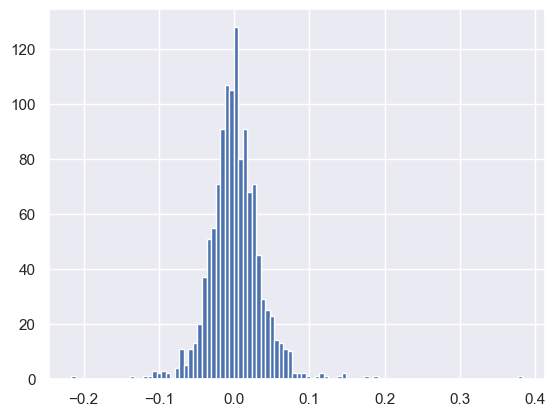

In [65]:
import seaborn as sns
sns.set()

df.Daily_Change.hist(bins=100)

<Axes: xlabel='Date'>

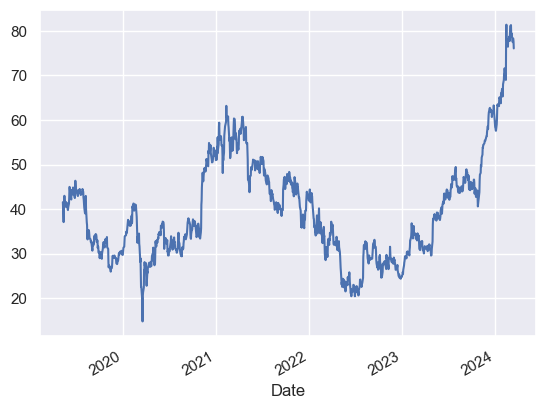

In [66]:
df.Close.plot()

### <a name='a7'></a> Filtrowanie danych

In [67]:
df

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.0000,41.06,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.2400,36.08,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.9600,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.8800,38.95,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.0600,41.25,43.00,38115524,42.240,41.29,0.041414
...,...,...,...,...,...,...,...,...
2024-03-11,78.70,78.8900,76.53,77.47,13781394,78.085,78.70,-0.015629
2024-03-12,78.01,78.4800,77.48,78.32,11303824,78.165,77.47,0.010972
2024-03-13,78.00,79.6911,77.93,78.25,12065099,78.125,78.32,-0.000894


In [68]:
df_positive = df[df.Daily_Change > 0]
df_positive

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-14,38.31,39.960,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.880,38.95,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.060,41.25,43.00,38115524,42.240,41.29,0.041414
2019-05-24,41.28,41.510,40.50,41.51,8786751,41.395,40.47,0.025698
2019-05-31,41.15,41.570,39.41,40.41,23209848,40.780,39.80,0.015327
...,...,...,...,...,...,...,...,...
2024-02-29,78.35,79.680,77.93,79.50,19405546,78.925,77.73,0.022771
2024-03-01,79.50,81.470,79.32,81.03,18528745,80.265,79.50,0.019245
2024-03-04,81.94,82.140,80.79,81.30,15989175,81.620,81.03,0.003332


In [69]:
df_positive.Daily_Change.mean()

0.025793188985148305

In [70]:
 df_negative = df[df.Daily_Change < 0]
 df_negative

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-13,38.79,39.2400,36.0800,37.10,79442420,37.945,41.57,-0.107529
2019-05-17,41.98,43.2900,41.2700,41.91,20225687,41.945,43.00,-0.025349
2019-05-20,41.19,41.6800,39.4600,41.59,29222330,41.390,41.91,-0.007635
2019-05-21,42.00,42.2400,41.2500,41.50,10802851,41.750,41.59,-0.002164
2019-05-22,41.05,41.2800,40.5000,41.25,9089469,41.150,41.50,-0.006024
...,...,...,...,...,...,...,...,...
2024-03-08,79.94,81.9800,78.2101,78.70,16414858,79.320,79.41,-0.008941
2024-03-11,78.70,78.8900,76.5300,77.47,13781394,78.085,78.70,-0.015629
2024-03-13,78.00,79.6911,77.9300,78.25,12065099,78.125,78.32,-0.000894


In [71]:
 df_negative.Daily_Change.mean()

-0.023225855822588796

In [72]:
df.Close == df.High #taki zapis tylko sprawdzi warunek

Date
2019-05-10    False
2019-05-13    False
2019-05-14     True
2019-05-15    False
2019-05-16    False
              ...  
2024-03-11    False
2024-03-12    False
2024-03-13    False
2024-03-14    False
2024-03-15    False
Length: 1221, dtype: bool

In [ ]:
df[df.Close == df.High]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-24,41.28,41.51,40.50,41.51,8786751,41.395,40.47,0.025698


In [74]:
df[df.Close == df.Low]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-08-12,39.84,39.95,37.00,37.00,20632310,38.420,40.05,-0.076155
2019-12-09,27.96,28.36,27.68,27.68,21098387,27.820,27.86,-0.006461
2019-12-27,30.80,31.06,30.17,30.17,18465965,30.485,30.67,-0.016303
2020-12-31,53.28,53.28,51.00,51.00,13282786,52.140,53.15,-0.040452
2021-12-31,42.53,43.12,41.93,41.93,13746893,42.230,42.66,-0.017112
2023-01-05,25.73,26.01,25.55,25.55,9942038,25.640,25.91,-0.013894
2023-05-16,37.93,38.15,37.44,37.44,21836864,37.685,38.14,-0.018353
2023-05-30,38.73,39.06,37.56,37.56,18143192,38.145,38.45,-0.023147


In [73]:
df.index > '2019-11-01'

array([False, False, False, ...,  True,  True,  True])

In [75]:
df[df.index > '2019-11-01']

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-11-04,31.45,31.7500,30.120,31.08,32330121,31.265,31.37,-0.009245
2019-11-05,29.13,29.3000,27.970,28.02,52180615,28.575,31.08,-0.098456
2019-11-06,26.06,27.5500,25.580,26.94,133569790,26.500,28.02,-0.038544
2019-11-07,26.80,27.4200,26.450,27.38,65949472,27.090,26.94,0.016333
2019-11-08,27.48,27.6200,26.915,27.01,45263118,27.245,27.38,-0.013514
...,...,...,...,...,...,...,...,...
2024-03-11,78.70,78.8900,76.530,77.47,13781394,78.085,78.70,-0.015629
2024-03-12,78.01,78.4800,77.480,78.32,11303824,78.165,77.47,0.010972
2024-03-13,78.00,79.6911,77.930,78.25,12065099,78.125,78.32,-0.000894


In [76]:
df[(df.index >= '2019-11-01') & (df.index < '2019-11-15')] #warunki powinny być w nawiasie ()

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-11-01,31.45,31.70,30.7412,31.37,10460430,31.410,31.50,-0.004127
2019-11-04,31.45,31.75,30.1200,31.08,32330121,31.265,31.37,-0.009245
2019-11-05,29.13,29.30,27.9700,28.02,52180615,28.575,31.08,-0.098456
2019-11-06,26.06,27.55,25.5800,26.94,133569790,26.500,28.02,-0.038544
2019-11-07,26.80,27.42,26.4500,27.38,65949472,27.090,26.94,0.016333
2019-11-08,27.48,27.62,26.9150,27.01,45263118,27.245,27.38,-0.013514
2019-11-11,27.03,27.21,26.2300,27.14,41445732,27.085,27.01,0.004813
2019-11-12,27.38,27.66,26.6600,26.70,37095389,27.040,27.14,-0.016212
2019-11-13,26.47,26.82,26.1400,26.71,34512663,26.590,26.70,0.000375


In [77]:
df[(df.index == '2019-11-01') | (df.index == '2019-11-07')]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-11-01,31.45,31.70,30.7412,31.37,10460430,31.41,31.50,-0.004127
2019-11-07,26.80,27.42,26.4500,27.38,65949472,27.09,26.94,0.016333


In [ ]:
df

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.000,41.0600,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.240,36.0800,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.960,36.8500,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.880,38.9500,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.060,41.2500,43.00,38115524,42.240,41.29,0.041414
...,...,...,...,...,...,...,...,...
2019-12-04,29.10,29.200,28.7000,29.06,22526474,29.080,29.02,0.001378
2019-12-05,28.94,28.990,28.1800,28.65,22567274,28.795,29.06,-0.014109
2019-12-06,28.40,28.925,27.8001,27.86,33144371,28.130,28.65,-0.027574


In [78]:
df[df.index.month == 5] #operacja na dacie

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.000,41.060,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.240,36.080,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.960,36.850,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.880,38.950,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.060,41.250,43.00,38115524,42.240,41.29,0.041414
...,...,...,...,...,...,...,...,...
2023-05-24,38.05,38.660,37.770,37.96,22074721,38.005,38.66,-0.018107
2023-05-25,38.48,38.585,37.525,37.95,18634222,38.215,37.96,-0.000263
2023-05-26,38.24,38.760,38.220,38.45,14438769,38.345,37.95,0.013175


In [ ]:
df[df.index.day == 1]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-07-01,46.98,47.0400,44.0600,44.27,17739998,45.625,46.38,-0.045494
2019-08-01,42.14,42.5355,41.0000,41.31,7349740,41.725,42.14,-0.019696
2019-10-01,30.37,30.5100,28.6500,29.15,13448055,29.760,30.47,-0.043321
2019-11-01,31.45,31.7000,30.7412,31.37,10460430,31.410,31.50,-0.004127
